# **Laboratorio 5: Una introducción a la optimización**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440:** Fundamentos del machine learning


**Nombres de los integrantes**


1.   Alejandro Narváez - 202123110
2.   Ali Cifci - 202210698

**Número del grupo**

LabML-4 10


# **Paquete optimize de SciPy** 

**SciPy** acrónimo de *Scientific Python* es una libreria de Python especializada en cálculos técnicos y científicos que hace uso de *Numpy* dentro de su implementación interna. 

Dentro de los muchos módulos que contiene **SciPy** nos interesa en particular *optimize* que proporciona distintas herramientas para calcular las raíces y valores mínimos (o máximos) de funciones matemáticas, hacer ajuste de curvas, resolver sistemas de ecuaciones y atender otras formas de optimización. En este módulo, una de las funciones más útiles es *minimize_scalar()* que permite minimizar funciones escalares y *minimize()* que hace lo propio para campos escalares. Veamos cómo  se puede utilizar esta función para resolver problemas simples de optimización:

A continuación se describen los argumentos de la función para su funcionamiento y se da un ejemplo de cálculo de minimizadores usando *minimize*.

En primer lugar, importamos la función *minimize()* del paquete *optimize* de **SciPy**:

In [1]:
from scipy.optimize import minimize

La función *minimize()* responde a la siguiente sintaxis:

```
minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
```

**Argumentos obligatorios:** 

- *fun*: Permite pasar la función objetivo, aquella que se desea minimizar. *La función objetivo debe implementarse a través de una función de Python que reciba por argumento un arreglo y retorne un valor escalar. Una vez definida la función se pasa como valor del argumento fun el nombre asignado*. Si por ejemplo se desea minimizar una función de 3 variables, la función de Python no debe recibir 3 argumentos sino un solo argumento X, un array de 3 elementos de modo que cada elemento represente a cada una de las variables independientes, es decir:

***Forma incorrecta:***

```
def funcion_objetivo(x,y,z):
  return x + y + z
```
***Forma correcta:***

```
def funcion_objetivo(X):
  x,y,z = X
  return x + y + z
```
Otra alternativa, menos explícita, puede ser: 

```
def funcion_objetivo(X):
  return X[0] + X[1] + X[2]
```


- *X0*: Es un arreglo de *Numpy* (o una *lista de Python* que contenga solamente números) que representa el punto inicial desde el cual inicia el proceso de optimización. Es un argumento obligatorio puesto que los métodos numéricos que utiliza *minimize()* para hallar los valores mínimos necesitan de un punto de partida para desarrollarse. Si la función tiene múltiples mínimos este argumento acelera la convergencia del método al evitar que se caiga en mínimos locales no deseados. 

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z

x0 = np.array([2, 3]) 
resultado = minimize(funcion_objetivo, x0)
```
*Estos son los argumentos mínimos que exige la función mínimize() para operar.*

**Argumentos opcionales** (Mencionamos aquellos que se encuentran dentro del alcance de un curso introductorio):

- *method*: Recibe como un *string* el nombre del método numérico que se desea utilizar para calcular el valor minimo de la función objetivo. Se puede elegir uno entre los 15 de los que dispone *minimize()* (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize para más información). La elección de un método particular obedece a las condiciones específicas del problema, el tipo de función y la presencia de restricciones. Por defecto *SciPy* pasa "BGFS" (Broyden-Fletcher-Goldfarb-Shanno algorithm),"L-BFGS-B" ó "SLSQP" (Sequential Least Squares Programming) según el problema incluya o no restricciones o límites. **Para este curso vamos a dejar a SciPy elegir el método por defecto.**

- *args*: Una tupla donde cada elemento corresponde a los parámetros adicionales de la función objetivo. Por ejemplo, si se tiene una función que recibe 3 variables y un parámetro p, la definición correcta de la función objetivo debería ser:

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z
```

Y en este caso, al invocar la función *minimize()*, se debe incluir el argumento *args* como una tupla de un elemento que contiene el valor correspondiente al parámetro p. Asumiendo que p tiene un valor de 0.2, la sintaxis correcta sería la siguiente:

```
argumentos = (0.2,)
x0 = np.array([2, 3]) 
resultado = minimize(funcion_objetivo, x0, args=argumentos)
```

- *bounds*: Permite especificar los límites máximo y mínimo de cada una de las varibles independientes de la función objetivo a través de una lista de tuplas, cada tupla de la forma *(min, max)*. Si se usa *None* en alguno de los límites se asume que la variable no tiene límite inferior o superior dependiendo el caso. Por ejemplo, si tenemos una función objetivo de 3 variables en donde la primera variable debe estar en el rango (10,20), la segunda variable debe ser mayor a 0 y la tercera variable debe ser menor a 10, la sintaxis correcta para el argumento *bounds* sería de la forma:

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z

x0 = np.array([2, 3]) 
limites = [(10,20),(0,None),(None,10)]
resultado = minimize(funcion_objetivo, x0, bounds = limites)
```

- *constraints*: Permite especificar las restricciones (o ligaduras) a las que está sujeta la optimización de la función objetivo. Cada restricción se define como un diccionario de Python con las llaves *type* (un String que especifíca el tipo de restricción: "eq" para igualdad, "ineq" para desigualdad), *fun* (que tiene por valor el nombre de una función en Python que implementa la restricción y sigue las mismas condiciones impuestas a la definición de la función objetivo --Importante: *Todas las restricciones deben despejarse de modo que la igualdad o desigualdad quede expresada en función a su relación con cero, si es una inecuación (una desigualdad) debe expresarse como $\geq$ 0 (no - negativa) y en caso de una ecuación se iguala directamente a cero*--) y finalmente *args* (que permite pasar parámetros adicionales a las restricciones a través de una tupla, funciona de la misma forma que el argumento *args* descrito anteriormente para la función objetivo). Si se tiene más de una restricción, se agrega cada uno de los diccionarios que las definen a una lista de Python que finalmente se pasa como valor general del argumento *constraints*. Para información más detallada, remítase a la documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

Parece un poco críptico, veamos su uso mediante un ejemplo:

Asuma que se tiene un problema de optimización con una función de 3 variables y las siguientes restricciones:

\begin{align}
4 x_1 + 3 x_2 - x_3 \geq 4 \\
x_1 + x_2 = 10
\end{align}

Lo primero que hacemos es expresar las restricciones en relación con el número cero, es decir:

\begin{align}
4 x_1 + 3 x_2 - x_3 - 4 \geq 0 \\
x_1 + x_2 - 10 = 0
\end{align}

Ahora, definimos cada restricción como una función de Python que toma por argumento un arreglo sobre las variables independientes y retorna un valor escalar -*las mismas condiciones impuestas a la función objetivo descritas anteriormente*-. En este caso, las funciones de restricción son:

```
def restriccion_1(X):
    x_1, x_2, x_3 = X
    return 4*x_1 + 3*x_2 - x_3 - 4
```
```
def restriccion_2(X):
    x_1, x_2, x_3 = X
    return x_1 + x_2 - 10
```

**Note que las funciones definidas retornan el valor de la igualdad y de la desigualdad en relación con cero, es decir, luego del despeje que hicimos en el paso anterior.**

Una vez definidas las funciones de restricción, construimos el diccionario para cada una con al menos 2 llaves: *type* y *fun*. Veamos como quedarían:

```
rest1 = {"type":"ineq","fun":restriccion_1}
rest2 = {"type":"eq","fun":restriccion_2}

```
Observen que el argumento *type* para la primera restricción es *"ineq"* puesto que se trata de una desigualdad y "*eq*" para la segunda restricción, al tratarse de una igualdad. Dado que tenemos más de una restricción, creamos una lista de Python que contenga los diccionarios ya definidos para finalmente ingresarlos al parámetro *constraints*:

```
restricciones = [rest1, rest2]

```

El código completo del ejercicio se vería así:

```

def funcion_objetivo(X):
  x,y,z = X
  return x + y + z

def restriccion_1(X):
    x_1, x_2, x_3 = X
    return 4*x_1 + 3*x_2 - x_3 - 4

def restriccion_2(X):
    x_1, x_2, x_3 = X
    return x_1 + x_2 - 10

rest1 = {"type":"ineq","fun":restriccion_1}
rest2 = {"type":"eq","fun":restriccion_2}
restricciones = [rest1, rest2]

x0 = np.array([2, 3]) 


resultado = minimize(funcion_objetivo, x0, constraints=restricciones)

```


**Resultado de la función *minimize()*:**

Luego de ejecutarse, la función *minimize()* retorna un diccionario con llaves *x* (Un arreglo de Numpy que contiene la solución hallada i.e. el valor mínimo para las variables independientes), *success* (Un valor booleano que indica si la solución fue éxitosa --es decir, si el método utilizado pudo converger), *message* (Un mensaje que describe la causa de terminación de la ejecución del algoritmo), *nit* (Número de iteraciones que le tomó al método para coverger a la solución) y *fun* (El valor de la función evaluado en el valor mínimo).

**Nota**: Al valor numérico hallado que minimiza una función objetivo se le conoce como *Minimizador* en el contexto de Machine Learning, del mismo modo al método numérico o algoritmo utilizado para optimizar una función objetivo se le conoce como *Optimizador*.

**Ejercicio de Ejemplo**

Asuma que se quiere minimizar la función $y = 3(x_1 - 10)^2 + 4(x_2 - 5)^2$ sujeto a la condición $x_1^2+x_2^2 \leq 9$ con $x_1 \geq 1$ y $x_2 \geq 2$.

In [2]:
#En primer lugar, importamos la función minimize de SciPy así como Numpy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
#En primer lugar, definimos la función objetivo a minimizar
def funcion_objetivo(X):
  return 3*(X[0] - 10)**2 + 4*(X[1] - 5)**2

In [4]:
#Definimos las restricciones y límites de acuerdo al formato indicado por minimize
def restriccion_1(X):
  return 9 - X[0] ** 2 - X[1]**2 # Recuerden que debemos expresar la restriccion de la forma >= 0

constraints = [{"type":"ineq","fun":restriccion_1},]
boundaries = [(1, None),(2, None)]

#Definimos el punto de partida para el proceso de minimización
x0 = [5,5]

In [5]:
#Finalmente ejecutamos la función minimize
minimization_f = minimize(funcion_objetivo, x0, bounds=boundaries, constraints=constraints)

In [6]:
# Imprimimos los resultados del proceso
print(f"Minimizador para X1 y X2 bajo la restricción impuesta: {minimization_f["x"]}")
print(f"Valor de la función en el mínimo hallado: {minimization_f["fun"]}")
print(f"Resultado de la convergencia del método: {minimization_f["success"]}")
print(f"Número de iteraciones que le tomo al método para converger: {minimization_f["nit"]}")


Minimizador para X1 y X2 bajo la restricción impuesta: [2.23606798 2.        ]
Valor de la función en el mínimo hallado: 216.83592130158132
Resultado de la convergencia del método: True
Número de iteraciones que le tomo al método para converger: 7


**1.1 Ejercicios**

**1.** Grafique la región $x_1^2+x_2^2 <= 9$ e incorpore los límites $x_1 >= 1$ y $x_2 >= 2$, marque la región resultante. Agregue un título relacionado así como etiquetas en los ejes.

*Hint:* Las funciones *axhline()* y *axvhline()* nos permiten dibujar líneas horizontales y verticales en el gráfico.
¿De qué otra forma podemos gráficar la región definida por la ecuación  $x_1^2+x_2^2 <= 9$ sin usar el método *ax.plot()*?

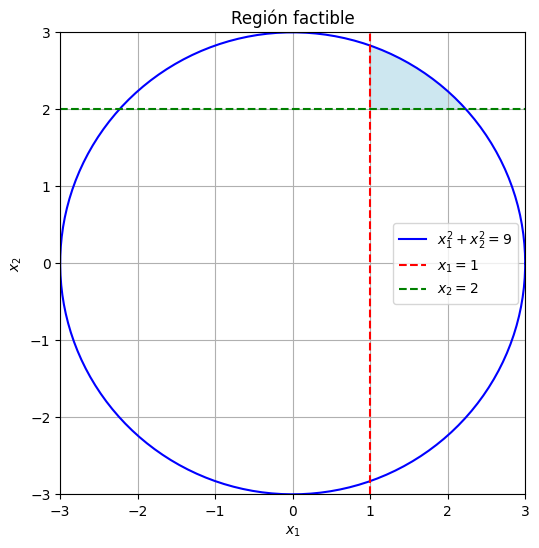

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la cuadrícula de puntos
x1 = np.linspace(-3, 3, 400)  # Valores en x1
x2 = np.linspace(-3, 3, 400)  # Valores en x2
X1, X2 = np.meshgrid(x1, x2)

# Definir la región de la desigualdad
region = (X1**2 + X2**2) <= 9  # Región dentro del círculo
lim_x1 = X1 >= 1  # Restricción x1 >= 1
lim_x2 = X2 >= 2  # Restricción x2 >= 2

# Aplicar todas las condiciones
region_total = region & lim_x1 & lim_x2 #Se crea una matriz booleana

# Graficar 
plt.figure(figsize=(6, 6))

# Usar contourf para colorear la región factible
plt.contourf(X1, X2, region_total, levels=[0.5, 1.5], colors=['lightblue'], alpha=0.6)
# Se usan valores de lavels entre 0.5 y 1.5 para que solo se coloreen los valores de 1 resultantes de región_total

# Dibujar el círculo frontera
theta = np.linspace(0, 2*np.pi, 300)
xc = 3 * np.cos(theta)
yc = 3 * np.sin(theta)
plt.plot(xc, yc, 'b-', label=r'$x_1^2 + x_2^2 = 9$')

# Dibujar las líneas límites
plt.axvline(x=1, color='r', linestyle='--', label=r'$x_1 = 1$')
plt.axhline(y=2, color='g', linestyle='--', label=r'$x_2 = 2$')

# Etiquetas y título
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Región factible')
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Mostrar la gráfica
plt.show()

**2.** Grafique las curvas de nivel para la función objetivo del ejercicio de ejemplo. Tome los límites $x_1 \in [-4,4], x_2 \in [-4,4]$ y considere 20 niveles de profundidad. Agregue un título relacionado así como etiquetas en los ejes.

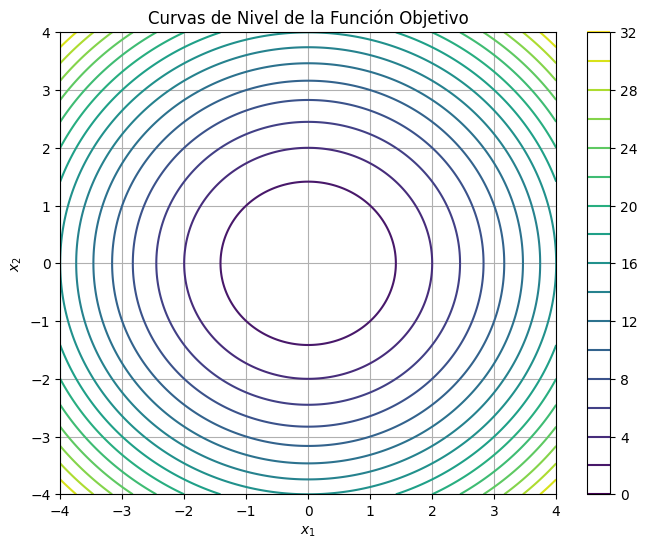

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función objetivo
def funcion_objetivo(x1, x2):
    return x1**2 + x2**2  # Ejemplo de función cuadrática

# Crear una malla de valores para x1 y x2
x1 = np.linspace(-4, 4, 400)
x2 = np.linspace(-4, 4, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = funcion_objetivo(X1, X2)

# Crear el gráfico de curvas de nivel
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(contour)  # Agregar una barra de colores para referencia

# Configurar el gráfico
plt.title('Curvas de Nivel de la Función Objetivo')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)

# Mostrar el gráfico
plt.show()

**3.** En un mismo gráfico, dibuje la región de interés y las curvas de nivel de la función objetivo. Finalmente muestre el minimizador que se calculó con la función minimize en el ejercicio de ejemplo. Agregue un título relacionado así como etiquetas en los ejes.

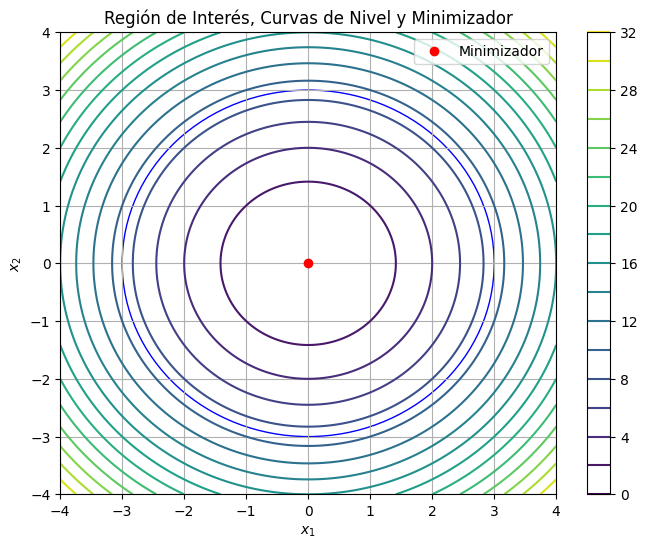

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Definir la función objetivo
def funcion_objetivo(x):
    return x[0]**2 + x[1]**2  # Ejemplo de función cuadrática

# Crear una malla de valores para x1 y x2
x1 = np.linspace(-4, 4, 400)
x2 = np.linspace(-4, 4, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = funcion_objetivo([X1, X2])

# Encontrar el minimizador
resultado = minimize(funcion_objetivo, x0=[0, 0])
minimizador = resultado.x

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar las curvas de nivel
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(contour)  # Agregar una barra de colores para referencia

# Graficar la región de interés (por ejemplo, un círculo)
circulo = plt.Circle((0, 0), 3, color='blue', fill=False)
plt.gca().add_artist(circulo)

# Graficar el minimizador
plt.plot(minimizador[0], minimizador[1], 'ro', label='Minimizador')

# Configurar el gráfico
plt.title('Región de Interés, Curvas de Nivel y Minimizador')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()

**4.**  ¿El minimizador hallado con *minimize()* corresponde efectivamente al valor mínimo dentro de la región de interés?, ¿Que pasaría con el valor mínimo si las restricciones fueran removidas?

In [4]:
import numpy as np
from scipy.optimize import minimize

# Definir la función objetivo
def funcion_objetivo(x):
    return x[0]**2 + x[1]**2

# Definir la restricción
def restriccion(x):
    return 9 - (x[0]**2 + x[1]**2)

# Encontrar el minimizador con restricciones
restricciones = {'type': 'ineq', 'fun': restriccion}
resultado = minimize(funcion_objetivo, x0=[1, 1], constraints=restricciones)
minimizador_con_restricciones = resultado.x

# Encontrar el minimizador sin restricciones
resultado_sin_restricciones = minimize(funcion_objetivo, x0=[1, 1])
minimizador_sin_restricciones = resultado_sin_restricciones.x

# Verificar si el minimizador con restricciones está dentro de la región
dentro_de_la_region = restriccion(minimizador_con_restricciones) >= 0

print("Minimizador con restricciones:", minimizador_con_restricciones)
print("¿Está dentro de la región de interés?", dentro_de_la_region)
print("Minimizador sin restricciones:", minimizador_sin_restricciones)

Minimizador con restricciones: [0. 0.]
¿Está dentro de la región de interés? True
Minimizador sin restricciones: [-1.07505143e-08 -1.07505143e-08]


**2. Resolución de un problema de optimización**

El Hospital San Juan de Dios desea determinar cuál es el número de diagnósticos para cada procedimiento (Respiratorio, Coronarias, Partos y Adicciones) que le permitirá maximizar su utilidad. Para cada diagnóstico se ha establecido el número de recursos que requiere (Horas de diagnóstico, días en camas UCI, cuidados de enfermería, días-cama), la disponibilidad total de cada recurso y el margen de utilidad de cada procedimiento. Además, se sabe que el hospital debe atender un mínimo número de casos en estos diagnósticos. La siguiente tabla resume toda la información:


|  Recursos             | Respiratorio | C.Coronarias | Partos | Adicciones | Disponibilidad |
|-----------------------|--------------|--------------|--------|------------|----------------|
| Horas de diagnóstico  | 7            | 10           | 2      | 1          |  325           |
| Dias cama UCI         | 1            | 2.5          | 0.5    | 0          |  55            |
| Dias - cama           | 5            | 7            | 2      | 7          |  420           |
| Cuidados de enfermería| 50           | 88           | 27     | 50         |  3800          |
| Margen de utilidad    | 40           | 250          | 30     | 5          |                |
| Casos Mínimos         | 15           | 10           | 20     |            |                |

**2.1.** Ejercicios

**1.** Defina la función objetivo y las restricciones asociadas de acuerdo a la información anterior.

In [ ]:
import numpy as np

# Coeficientes de la función objetivo (negativos para maximizar con linprog)
#  f = 40*x_R + 250*x_C + 30*x_P + 5*x_A
# linprog minimiza, así que usamos -f
c = np.array([-40, -250, -30, -5])

# Matriz de restricciones A_ub y vector b_ub para
#     A_ub @ x <= b_ub
# Correspondiente a:
#  7x_R + 10x_C + 2x_P + 1x_A    <= 325
#  1x_R + 2.5x_C + 0.5x_P + 0x_A <= 55
#  5x_R + 7x_C   + 2x_P   + 7x_A <= 420
# 50x_R + 88x_C  + 27x_P  + 50x_A <= 3800
A_ub = np.array([
    [ 7.0, 10.0, 2.0,  1.0],
    [ 1.0,  2.5, 0.5,  0.0],
    [ 5.0,  7.0, 2.0,  7.0],
    [50.0, 88.0, 27.0, 50.0]
])


**2.** Defina los límites para cada una de las variables independientes (bounds)

In [ ]:
x_bounds = [(15, None),  # x1 ≥ 15
            (10, None),  # x2 ≥ 10
            (20, None),  # x3 ≥ 20
            (0, None)]   # x4 ≥ 0


**3.** Calcule el minimizador haciendo uso de la función *minimize()* de **SciPy**

In [ ]:
# Importamos NumPy para la creación y manipulación de arreglos
import numpy as np

# Importamos la función 'minimize' del módulo 'scipy.optimize'
from scipy.optimize import minimize

# Definimos la función objetivo en términos de las variables (x_R, x_C, x_P, x_A).
# Puesto que 'minimize' minimiza por defecto, usamos el negativo de la función
# que queremos maximizar:
def funcion_objetivo(X):
    x_R, x_C, x_P, x_A = X
    return -(40*x_R + 250*x_C + 30*x_P + 5*x_A)

# A continuación, definimos cada restricción como una función que debe
# retornar un valor >= 0 (forma compatible con 'SLSQP').

# Restricción 1: 7x_R + 10x_C + 2x_P + x_A <= 325
def c1(X):
    x_R, x_C, x_P, x_A = X
    return 325 - (7*x_R + 10*x_C + 2*x_P + x_A)

# Restricción 2: x_R + 2.5x_C + 0.5x_P <= 55
def c2(X):
    x_R, x_C, x_P, x_A = X
    return 55 - (x_R + 2.5*x_C + 0.5*x_P)

# Restricción 3: 5x_R + 7x_C + 2x_P + 7x_A <= 420
def c3(X):
    x_R, x_C, x_P, x_A = X
    return 420 - (5*x_R + 7*x_C + 2*x_P + 7*x_A)

# Restricción 4: 50x_R + 88x_C + 27x_P + 50x_A <= 3800
def c4(X):
    x_R, x_C, x_P, x_A = X
    return 3800 - (50*x_R + 88*x_C + 27*x_P + 50*x_A)

# Restricción 5: x_R >= 15  =>  x_R - 15 >= 0
def c5(X):
    x_R, x_C, x_P, x_A = X
    return x_R - 15

# Restricción 6: x_C >= 10  =>  x_C - 10 >= 0
def c6(X):
    x_R, x_C, x_P, x_A = X
    return x_C - 10

# Restricción 7: x_P >= 20  =>  x_P - 20 >= 0
def c7(X):
    x_R, x_C, x_P, x_A = X
    return x_P - 20

# Restricción 8: x_A >= 0   =>  x_A - 0 >= 0
def c8(X):
    x_R, x_C, x_P, x_A = X
    return x_A - 0

# Agrupamos todas las restricciones en una lista de diccionarios,
# cada una con type="ineq" (desigualdad).
constraints = [
    {"type": "ineq", "fun": c1},
    {"type": "ineq", "fun": c2},
    {"type": "ineq", "fun": c3},
    {"type": "ineq", "fun": c4},
    {"type": "ineq", "fun": c5},
    {"type": "ineq", "fun": c6},
    {"type": "ineq", "fun": c7},
    {"type": "ineq", "fun": c8}
]

# Definimos el punto inicial (debe ser factible).
x0 = np.array([15, 10, 20, 0])

# Llamamos a la función 'minimize' para resolver el problema.
resultado = minimize(
    funcion_objetivo,  # Función objetivo que hemos definido
    x0,                # Punto inicial
    method='SLSQP',    # Método de optimización adecuado para restricciones
    constraints=constraints
)



**4.** Imprima el minimizador calculado, evalue y muestre que se cumplen cada una de las restricciones del problema.

In [ ]:
# 1) Mostrar solución
print("Éxito de la optimización:", resultado.success)
print("Mensaje del solver:", resultado.message)

# 'resultado.x' es el minimizador => (x_R, x_C, x_P, x_A)
x_opt = resultado.x
x_R_opt, x_C_opt, x_P_opt, x_A_opt = x_opt

print("\nMinimizador (solución óptima):")
print("x_R =", x_R_opt)
print("x_C =", x_C_opt)
print("x_P =", x_P_opt)
print("x_A =", x_A_opt)

# 2) Recordar que 'funcion_objetivo(X)' está definida como NEGATIVO de lo que queremos maximizar
#    => para obtener el valor máximo de la función original, usamos -resultado.fun
print("\nValor máximo de la función objetivo:")
print("Z_max =", -resultado.fun)
